In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [117]:
df = pd.read_csv("/Users/mac/Desktop/projects/zoomcamp ml/Lesson 3 /bank+marketing/bank/bank.csv", sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [118]:
df = df[['age', 'job', 'marital', 'education', 'balance', 'housing','contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,4789,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,1350,yes,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,1476,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,yes,unknown,5,may,226,1,-1,0,unknown,no


In [119]:
df.y = (df.y == 'yes').astype(int)

In [120]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,4789,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,1350,yes,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,1476,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,yes,unknown,5,may,226,1,-1,0,unknown,0


In [121]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_test), len(df_val)

(2712, 905, 904)

In [122]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [123]:
numerical = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

In [124]:
from sklearn.metrics import roc_auc_score

feature_auc = {}

for feature in df_train[numerical.columns]:
    auc = round(roc_auc_score(y_train, df_train[feature]), 3)
    
    if auc < 0.5:
        print(f"Inverting {feature} (AUC={auc:.3f})")
        df_train[feature] = -df_train[feature]
    
    feature_auc[feature] = auc
    print(f"{feature}: {auc:.3f}")

age: 0.528
balance: 0.589
Inverting day (AUC=0.486)
day: 0.486
duration: 0.811
Inverting campaign (AUC=0.452)
campaign: 0.452
pdays: 0.595
previous: 0.603


### Train Model 

In [125]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records') 

In [126]:
df_train[:1]

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,technician,married,secondary,0,no,cellular,-11,mar,101,-1,-1,0,unknown


In [127]:
dict_train[:1]

[{'age': 41,
  'job': 'technician',
  'marital': 'married',
  'education': 'secondary',
  'balance': 0,
  'housing': 'no',
  'contact': 'cellular',
  'day': -11,
  'month': 'mar',
  'duration': 101,
  'campaign': -1,
  'pdays': -1,
  'previous': 0,
  'poutcome': 'unknown'}]

In [128]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_train[:1]

array([[ 41.,   0.,  -1.,   1.,   0.,   0., -11., 101.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,
          0.,   1.,   0.]])

In [129]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [130]:
dict_val[:1]

[{'age': 45,
  'job': 'services',
  'marital': 'married',
  'education': 'secondary',
  'balance': 0,
  'housing': 'no',
  'contact': 'cellular',
  'day': 8,
  'month': 'jul',
  'duration': 47,
  'campaign': 7,
  'pdays': -1,
  'previous': 0,
  'poutcome': 'unknown'}]

In [131]:
X_val = dv.transform(dict_val)
X_val[:1]

array([[45.,  0.,  7.,  1.,  0.,  0.,  8., 47.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0., -1.,  0.,  0.,  0.,  1.,  0.]])

In [132]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [133]:
y_val.shape, y_pred.shape

((904,), (904,))

In [134]:
auc = roc_auc_score(y_val, y_pred)
print(f"ROC AUC: {auc:.3f}")

ROC AUC: 0.659


### Question 3: Precision and Recall


At which threshold precision and recall curves intersect?

0.265
0.465
0.665
0.865


Ans: 0.265

In [135]:
threshold = np.arange(0, 1, 0.01)
threshold

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [136]:
from sklearn.metrics import precision_score, recall_score

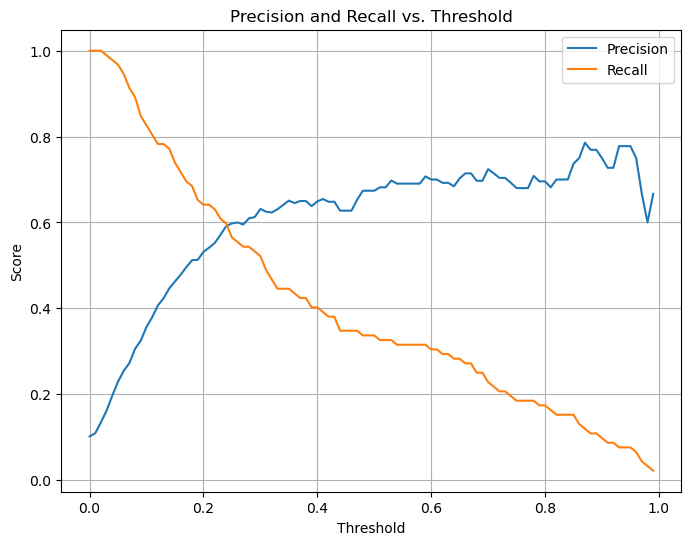

In [137]:
precision = []
recall = []

y_probs = model.predict_proba(X_val)[:, 1]

for t in threshold:
    pred = (y_probs >= t).astype(int)
    precision.append(precision_score(y_val, pred))
    recall.append(recall_score(y_val, pred))

plt.figure(figsize=(8, 6))
plt.plot(threshold, precision, label="Precision")
plt.plot(threshold, recall, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold")
plt.legend()
plt.grid()
plt.show()


### Question 4: F1 score

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62

Ans: 0.22

In [138]:
from sklearn.metrics import f1_score

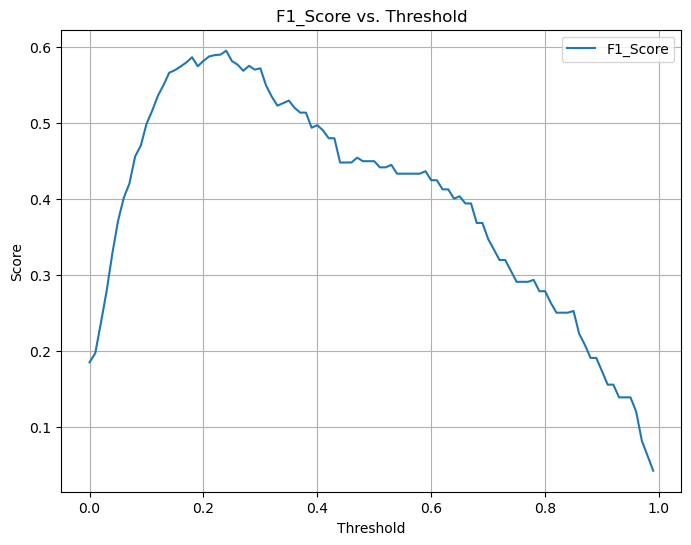

In [139]:
f1_scores = []

for t in threshold:
    pred = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_val, pred, zero_division=0))


plt.figure(figsize=(8, 6))
plt.plot(threshold, f1_scores, label="F1_Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("F1_Score vs. Threshold")
plt.legend()
plt.grid()
plt.show()
    


### Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26

In [140]:
from sklearn.model_selection import KFold

In [141]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [142]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [143]:
len(train_idx), len(val_idx)

(2892, 724)

In [144]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [145]:
len(df_train), len(df_val)

(2892, 724)

In [146]:
y_train = df_train.y.values
y_val = df_val.y.values

del df_train['y']
del df_val['y']

In [147]:
def model_train(data, y_train, C=1.0):
    dicts = data.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y_train)

    return dv, model

In [148]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [152]:
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    del df_train['y']
    del df_val['y']

    dv, model = model_train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.922 +- 0.000
0.909 +- 0.013
0.901 +- 0.015
0.896 +- 0.016
0.891 +- 0.017


### Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.000001, 0.001, 1]
Initialize KFold with the same parameters as previously
Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

- 0.000001
- 0.001
- 1

Answer: 1

In [150]:
n_splits = 5
for C in [0.000001, 0.001, 1]:
    scores = []
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        del df_train['y']
        del df_val['y']

        dv, model = model_train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print('%s %.3f +- %.4f' % (C, np.mean(scores), np.std(scores)))


1e-06 0.327 +- 0.0134
0.001 0.767 +- 0.0198
1 0.891 +- 0.0171
